<h1>Project Code</h1>
<h2>CS243 Project</h2>
<h3>Dataset: Suicide Rates Overview 1985 to 2016</h3>


<p>Initial Importing</p>

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Load Dataset (master.csv) <br>
This was found at https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016?select=master.csv

In [26]:
file_path = 'master.csv'
data = pd.read_csv(file_path)

<h1>Find information about dataset</h1>

In [27]:
data_info = data.info()
full_summary_stats = data.describe(include='all')
data_preview = data.head()
data_info, full_summary_stats, data_preview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


(None,
           country          year    sex          age   suicides_no  \
 count       27820  27820.000000  27820        27820  27820.000000   
 unique        101           NaN      2            6           NaN   
 top     Mauritius           NaN   male  15-24 years           NaN   
 freq          382           NaN  13910         4642           NaN   
 mean          NaN   2001.258375    NaN          NaN    242.574407   
 std           NaN      8.469055    NaN          NaN    902.047917   
 min           NaN   1985.000000    NaN          NaN      0.000000   
 25%           NaN   1995.000000    NaN          NaN      3.000000   
 50%           NaN   2002.000000    NaN          NaN     25.000000   
 75%           NaN   2008.000000    NaN          NaN    131.000000   
 max           NaN   2016.000000    NaN          NaN  22338.000000   
 
           population  suicides/100k pop country-year  HDI for year  \
 count   2.782000e+04       27820.000000        27820   8364.000000   
 unique  

We can tell that this dataset captures data regarding suicide rates from 1985-2016 from 101 different countries. This dataset includes suicide rates,demographic information, and socioeconomic information for a total of 27,280 observations. <br>
We can see that this dataset includes a lot of text information that could easily be mapped to numbers. We have the following features:

<ul>Demographic Information</ul>

<li>country - String</li>
<li>sex - String</li>
<li>age - String</li>
<li>generation - String</li>

<ul>Suicide Rates</ul>
<li>suicides_no - Integer, total number of suicides</li>
<li>suicides_100k pop - Float, total number of suicides per 100,000 people</li>

<ul>Socioeconomic Information</ul>
<li>HDI for year - Float, Human Development Index value</li>
<li>gdp_for_year ($) - String, what the GDP was for the country at the time</li>
<li>gdp_per_capita ($) - Integer, what the GDP was for the country at the time for a specific area</li>

<ul>Data Collection Information</ul>
<li>Year - Integer, when the information was collected</li>

Right away, I can see that I could afford to map the Sex, Age, and Generation to numbers to better compare features. This works because the data is representative to a group of their own, so having a number system to categorize works the same way. I also notice right away that the Data Collection and Demographic Information and Socioeconomic Information features will give a lot of variability to compare to the Suicide Rates information.

Furthermore, at glance with the summary, we can see that the males to females information is almost equally balanced. We see that age is divided into 6 different groups, with 15-24 being the most frequent age range. There are also 6 generation groups, with Generation X being the most common.

We also see that some Socioecononic Information has some missing values. We also see that the type of data is not as consistent. 

Lastly, when comparing suicide rates per capita (to ensure fairness and equal weight for each country), we can quickly see that, per 100,000 people, the average number of suicide rates is about 12-13 people, with the middle value of the range being around 6. We can also see that the GDP per capita ranges large from $251-$126,352.

<h1>Visualize Data</h1>

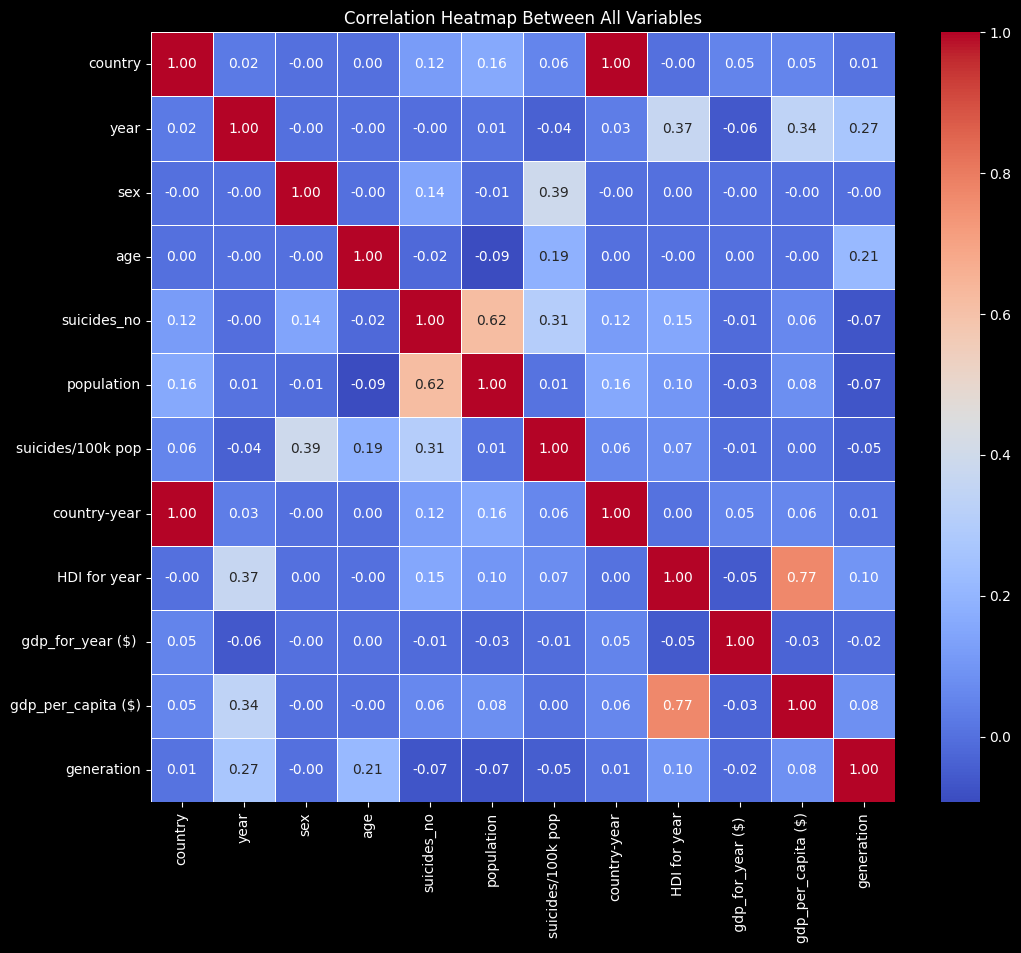

In [28]:
encoded_data = data.copy()
label_encoder = LabelEncoder()
categorical_cols = encoded_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])
correlation_matrix = encoded_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap Between All Variables")
plt.show()


After making this heatmap, we can get an idea of the correlations between different variables in this dataset. Obviously, these should not be fully trusted blindly, but it can give us an idea of how much different combinations of two variables correlate with each other. We can obviously see that population and suicide rate have a high amount of correlation involved, but this makes sense as, with more people, there are higher possibilities of suicide. This does not give us much information. We can also see that GDP per capita and HDI seem to have a high correlation. However, since there is not much information for socioeconomic information, we must be sure to mention that these two variables might not give us fully believable data.

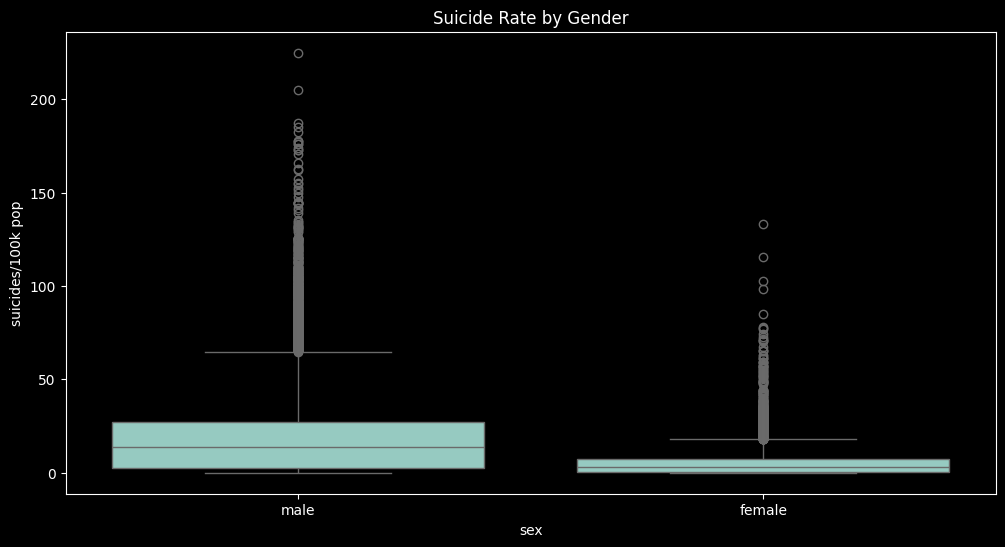

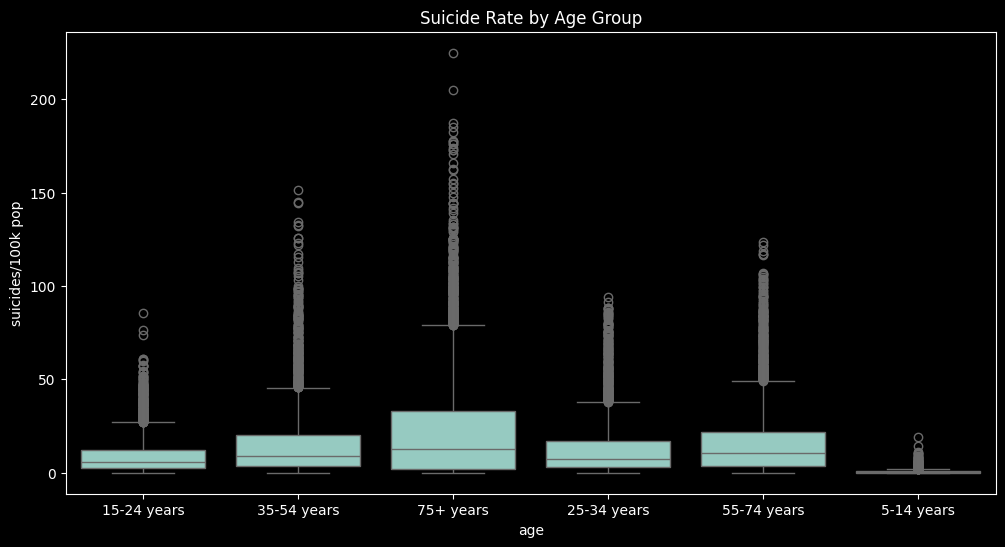

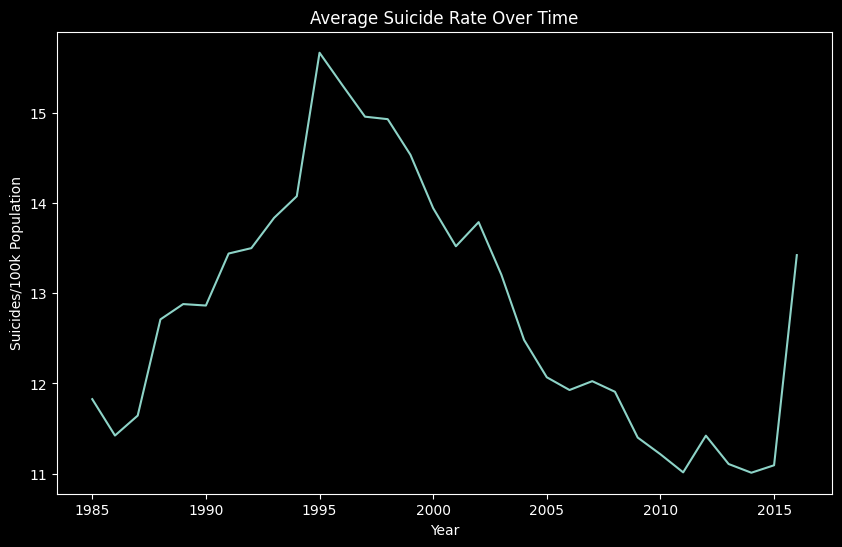

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='sex', y='suicides/100k pop')
plt.title("Suicide Rate by Gender")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='age', y='suicides/100k pop')
plt.title("Suicide Rate by Age Group")
plt.show()

avg_suicide_rate_by_year = data.groupby('year')['suicides/100k pop'].mean()
plt.figure(figsize=(10, 6))
avg_suicide_rate_by_year.plot()
plt.title("Average Suicide Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Suicides/100k Population")
plt.show()

Looking at the boxplots of the gender and age demographics, we can see that categorizing the strings into integers allowed us to continue getting good visualizations from the power of Python. We can distinguish from the plots that the males seem to have a higher suicide rate than women (using per capita to reduce bias in numbers). We also find that the males have a higher variability than women in these statistics, so this might be something to just be weary of. The boxplots for the age group also showed some interesting results, with the age older than 75 seeming to show higher suicide rates. The same thing applies here, as the larger categories seem to show the higher amount of variability. Lastly, we can see that there was a spike in suicide rates in 1995, and we reached our all time low in 2011, but post-2015, we have been increasing our suicide rates.

<h1>PCA</h1>

PCA (Principal Component Analysis) helps to reduce dimensions by creating a new set of variables (principal components) that assumes the maximum variability in the data. By getting the principal components, we can essentially go from the large amount of features we were analyzing earlier to two that we can use as axis for a 2D plot. This is, in a way, a 2D example of the correlation in our features. Since this is a number manipulation tactic, we do need to do a few transformation techniques. This includes making gdp_for_year ($) a numeric column. We also need to deal with the data that do not have all their values, so we are deciding to remove them instead. A good fact about this dataset is that it has so much data that we are able to drop a few observations in order to analyze our data. After this, we scale our data for it all to be comparable in relation to the rest of the dataset. We then analyze the covariance chart (similar to the one created earlier) to analyze which components are correlated with one another, and which are not. Once the PCA is created, we can figure out the weights of each feature to see how much they influence the singular components of the PCA (loadings); these refer to the first and second largest variables in terms of variance in the dataset, with both variables being uncorrelated with each other. We then create a PCA plot, with clustered and unclustered being options. With unclustered, we can find the natural spread of the data in the entire dataset space, indicating if we have any holes, seperations, or groups. Using a K-means clustering for PCA, we can also get a clustered PCA graph, showing us specific groups, patterns, or big categories to be cautious of; this includes the size of the data on if there are more groups, more population in smaller groups, how big certain behaviors are, etc.

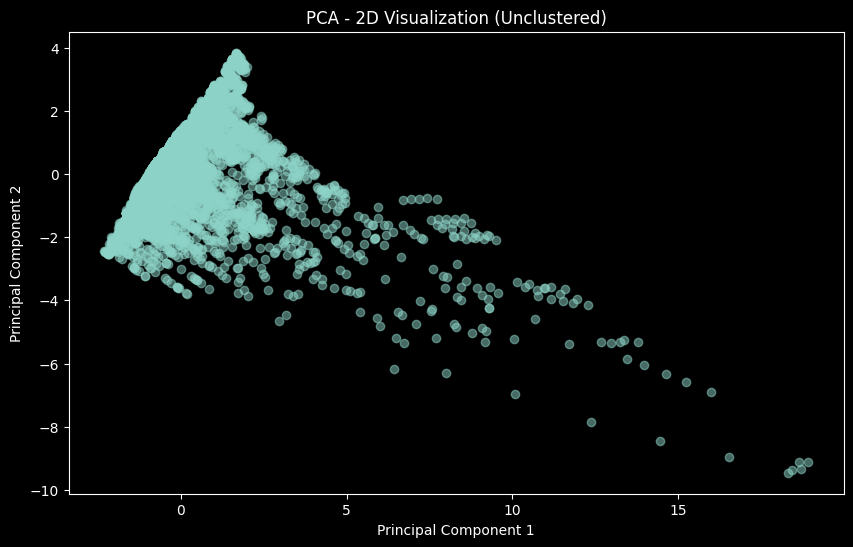

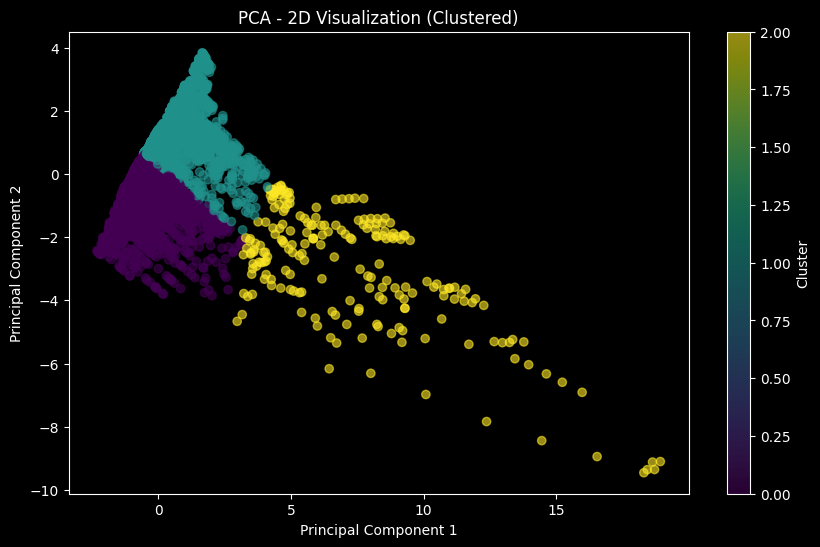

(array([0.37657371, 0.25629569]),
                          PC1       PC2
 year                0.156788  0.434234
 suicides_no         0.462542 -0.337191
 population          0.474728 -0.363086
 suicides/100k pop   0.075736 -0.091117
 HDI for year        0.370747  0.508565
 gdp_per_capita ($)  0.342759  0.514162
 gdp_for_year ($)    0.524816 -0.186032)

In [30]:
data['gdp_for_year ($)'] = data[' gdp_for_year ($) '].str.replace(',', '').astype(float)
numeric_data = data.select_dtypes(include=['float64', 'int64']).dropna()
scaler = StandardScaler()
scaled_cleaned_data = scaler.fit_transform(numeric_data)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_cleaned_data)
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
plt.title("PCA - 2D Visualization (Unclustered)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
explained_variance = pca.explained_variance_ratio_
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=numeric_data.columns
)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_components)
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("PCA - 2D Visualization (Clustered)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()
explained_variance, loadings


<p>We can tell from this information that the first component shows 37% of the variance, and the second component explains 26% of the variance. Together, being about 63% variance, we have a relatively good indicator of performance of this so far. We can also see that PC1 has gdp_for_year ($), population, and suicides_no as part of its weights, while PC2 has gdp_per_capita ($), HDI for year, and year as part of its weights. This shows that we are comparing more economic and demographic factors with socioeconomic trends over time, which is a good analysis to get answers for. From the graphs, we can pick up that the spread is pretty diaganol, indicating that multiple factors affect the variance, and that it is not just linear. We can see that we end up with three different clusters in the graph. Cyan shows that we are working with lower populations and lower GDP, assumed from low PC1 and PC2. We also have a yellow which shows large populations and GDP, assumed from high values for PC1 and low values for PC2. Lastly, we have purple, which indicates middle range GDP and population, assumed also from moderate PC1 and PC2 values.</p>

In [31]:
numeric_data_with_clusters = numeric_data.copy()
numeric_data_with_clusters['Cluster'] = clusters
cluster_means = numeric_data_with_clusters.groupby('Cluster').mean()
cluster_means


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_for_year ($)
Cluster,,,,,,,
0,2002.470810,125.300437,1.504835e+06,11.930963,0.717759,7811.562153,1.598187e+11
1,2009.989096,137.810135,1.253075e+06,11.586209,0.865193,41155.094933,6.270883e+11
2,2005.461905,3158.661905,1.907686e+07,19.478190,0.872305,40978.242857,8.669297e+12


We can then look into each cluster to find what the average values look like for each area. We can see for the purple and cyan clusters, we have similar values in population and suicide rate; even with the differences in GDP, we can see that they have similar outputs. However, the yellow cluster seemed to have a much larger suicide rate, total suicides, population, GPD and HDI. This shows a correlation between these values from this cluster.

<h1>K-Means</h1>

This step puts the features/data combinations that we have and combines them into clusters. Similar to the clustered PCA, in which we used K-means to find out the cluster already, we might end up with either larger or smaller values for k. This can be determined by doing a mean-square analysis called the 'Elbow Method'. This method allows us to find, for what k clusters, comes with the most gain in terms of insights. Too high of k would give us complicated data when we are trying to find generalizable results. Too low of k could give us too generic of insights, and we would not be able to apply it to certain combinations of features. By creating the inertia graph that gives us the sum of squares of different numbers of clusters, we can visually find where the middle point is that gives us the maximum change in inertia before slowing down. Once we have this value, we can create the k-means graph that should give us more/less/similar numbers of areas that show different groupings in the dataset. 

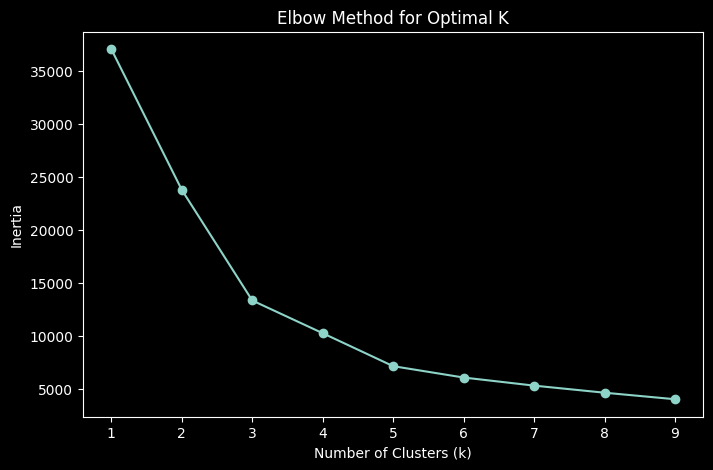

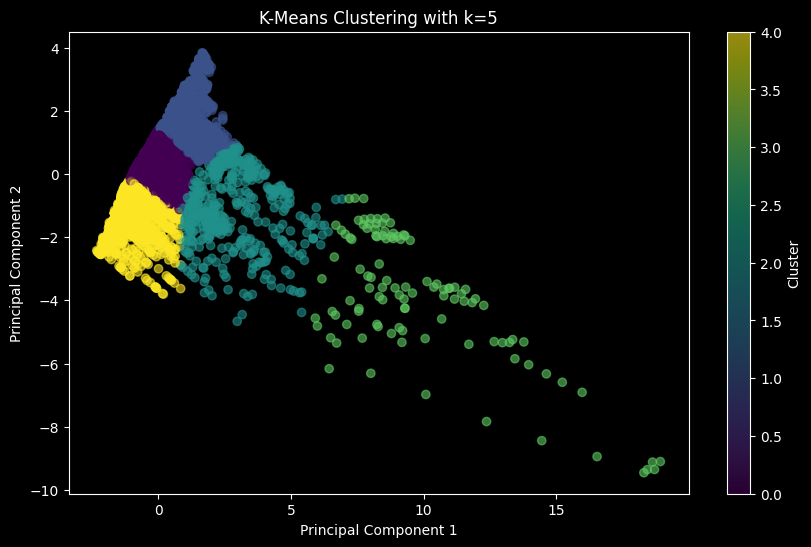

In [32]:
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(pca_components)
    inertia.append(kmeans_test.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_components)
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title(f"K-Means Clustering with k={optimal_k}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


After using the Elbow Method, we found out visually that the ideal number of k is 5. Using this value, we created another PCA graph using five different groupings. On first glance, most of the data is pretty individual, with a tiny bit of overflow in each grouping. There are different type of groupings as well, with three of them tight and precise and two others that are pretty spread out. Otherwise, the information from the graph is similar to the last graph from k=3, so we will go straight ahead to the averages of each cluster.

In [33]:
numeric_data_with_clusters = numeric_data.copy()
numeric_data_with_clusters['Cluster'] = clusters
cluster_means = numeric_data_with_clusters.groupby('Cluster').mean()
cluster_means

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_for_year ($)
Cluster,,,,,,,
0,2008.282453,78.020175,8.526875e+05,11.354200,0.792650,16392.278471,1.688607e+11
1,2011.220339,99.053672,1.152930e+06,10.398828,0.895951,60020.716808,7.756333e+11
2,2005.324444,1258.286667,1.014006e+07,18.028978,0.824462,28349.231111,2.918852e+12
3,2006.672897,4173.233645,2.343506e+07,19.414019,0.894626,47501.532710,1.234385e+13
4,1997.918445,105.600991,1.362949e+06,12.429192,0.676136,4453.955030,8.078876e+10


From this information, we can tell the following:
- Cluster 0 (Yellow): represents small populations with average development levels
- Cluster 1 (Purple): represents small populations and low development levels
- Cluster 2 (Cyan): represents average populations and average development levels
- Cluster 3 (Blue): represents low populations with high development levels
- Cluster 4 (Green): represents high populations with high development levels

Cluster 3 had the highest average suicide rate (this could be from loneliness, indicating that high development levels does not necessarily help). The GDP does not seem to have trends with the suicide rate directly from these clusters, and it seems like the lower HDI values seem to be correlated with lower average suicide rates. Interestingly, the average year of the observations for the high population with high development levels seems to be significantly older than the other clusters.

<h1>Clustering with Fewer Principal Components</h1>

For this part of the assignment, we will try reducing the number of principal components (2->1) to analyze if this change still produces meaningful clusters/information. This explores the trade-off between more dimensions versus variance. We can also see if going from one principal component to two actually causes a meaningful change. Also, if this works, we can see if a single feature causes the change instead (GDP, Population, etc.).

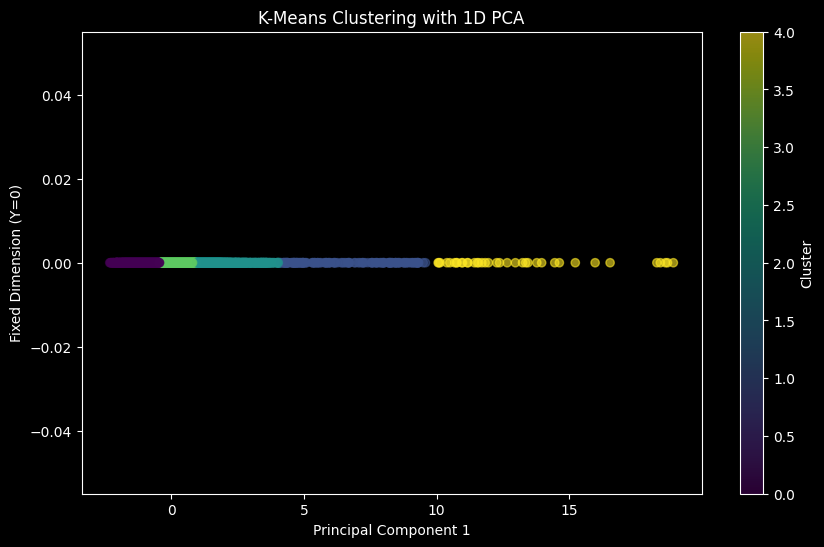

(                   year  suicides_no    population  suicides/100k pop  \
 Cluster_1D                                                              
 0           2002.334364    43.019320  6.280712e+05           9.321448   
 1           2005.833333  2643.895833  1.615280e+07          19.407708   
 2           2009.551926   446.513400  4.174881e+06          13.333266   
 3           2007.424847   136.208239  1.459048e+06          14.390332   
 4           2009.729730  5945.027027  3.268468e+07          18.629730   
 
             HDI for year  gdp_per_capita ($)  gdp_for_year ($)  
 Cluster_1D                                                      
 0               0.703795         6433.880216      4.053227e+10  
 1               0.881201        42683.298611      8.219648e+12  
 2               0.875097        53816.844221      1.543463e+12  
 3               0.823318        25411.591567      2.699566e+11  
 4               0.906811        52221.594595      1.508201e+13  ,
                 

In [34]:
pca_1d = PCA(n_components=1)
pca_1d_components = pca_1d.fit_transform(scaled_cleaned_data)
kmeans_1d = KMeans(n_clusters=5, random_state=42)
clusters_1d = kmeans_1d.fit_predict(pca_1d_components)
numeric_data_with_clusters_1d = numeric_data.copy()
numeric_data_with_clusters_1d['Cluster_1D'] = clusters_1d
cluster_1d_means = numeric_data_with_clusters_1d.groupby('Cluster_1D').mean()
kmeans_2d = KMeans(n_clusters=5, random_state=42)
clusters_2d = kmeans_2d.fit_predict(PCA(n_components=2).fit_transform(scaled_cleaned_data))
numeric_data_with_clusters_2d = numeric_data.copy()
numeric_data_with_clusters_2d['Cluster_2D'] = clusters_2d
cluster_2d_means = numeric_data_with_clusters_2d.groupby('Cluster_2D').mean()
plt.figure(figsize=(10, 6))
plt.scatter(pca_1d_components[:, 0], [0] * len(pca_1d_components), c=clusters_1d, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering with 1D PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Fixed Dimension (Y=0)")
plt.colorbar(label="Cluster")
plt.show()
cluster_1d_means, cluster_2d_means


From first glance at the graph, we can see that the 1D analysis seems to have a similar amount of overlap between each value, indicating that the first principal component was not the only indicator of the trends shown in the dataset. We do have less dimensions to work with here (one line), but it is also obvious that we do not have enough dimensions in this graph to describe such a complicated dataset. Hence, one dimensional analysis was not good enough for this dataset. The comparison charts below the graphs also confirm that this is an oversimplified analysis, with the clusters being close but not exact values in comparison from 1D to 2D graphs.

<h1>Reflection</h1>

<p>All in all, this was a straightforward project. The code was done using the help of well-known packages, and the analysis of the data given from these tools took significantly longer than actually getting to the results of the data. Making sense of the data in the context of the information also proved to be difficult. What made breaking down the results easier for me was to drop the NaN value rows to significantly drop the amount of information to work with (albeit giving up accuracy). This allowed me to work with a 'perfect' dataset that was easier to remove bias from. This all from done better when looking at the dataset graphically first and understanding what each column gives you. Producing the PCA was difficult, and finding out the information in context proved to be difficult, but progress was eventually made. I did enjoy this project really well, and there are good conclusions to be made out of this. We can see that countries that have higher GDP and populations seem to have a higher suicide rate. We also found that, in this dataset, socioeconomic factors were the most telling of a suicide rate for a country.</p>